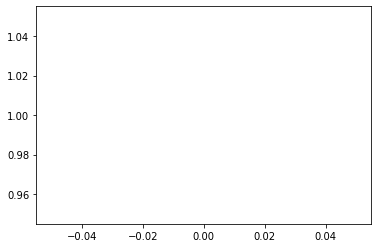

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1])

100%|██████████| 4/4 [00:00<00:00, 3498.90it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loading from output/model_rec_text_best_scale_2/CRNN_LSTM_min_loss.pth
len(dataset)=4
txt_predict='from', txt_fact='from'
txt_predict='select', txt_fact='select'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


txt_predict='*', txt_fact='*'
txt_predict='[users]', txt_fact='[users]'


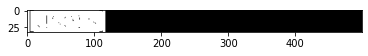

In [48]:
import MyDatasetRec
import importlib
importlib.reload(MyDatasetRec)
from MyDatasetRec import MyDatasetRec
from torch.utils.data import DataLoader
from config_rec import all_alph
import MyModelRec as my_model
import torch
from itertools import groupby
from MyRecognizer import Recognizer
        
conf = {
    'fonts':["example/TextBPNPlusPlus/dataset/MyGenerator/font.ttf"],
    'is_crop':[True],
    #'texts':['#$%^&*()py','-=~!@#$%', '()_+[];','[users]','(users)'],
    'texts':['select','*', 'from','[users]'],
    'size_images':[(160 ,32)] #cnn_output_width * 16 + 2
    , 'text_colors':['#000000']
    , 'background_colors':['#ffffff']
    , 'is_simple_text':[True]
    , 'font_sizes':[22]
    , 'is_scale':[True]
    , 'scale_size':[(None, 32)]
}

dataset = MyDatasetRec([conf], all_alph)

#model_path = 'output/model_rec_/CRNN_LSTM_v1_130.pth'
#model_path = 'output/model_rec_text_best_scale/CRNN_LSTM_min_loss.pth'
model_path = 'output/model_rec_text_best_scale_1/CRNN_LSTM_min_loss.pth'
#model_path = 'output/model_rec_best/CRNN_LSTM_min_loss.pth'
#model_path = 'output/model_rec_/CRNN_LSTM_v1_130.pth'
model_path = 'output/model_rec_text_best_scale_2/CRNN_LSTM_min_loss.pth'
rec = Recognizer(model_path, all_alph)

def correct_chars(text:str):
    
    #{'>>;.^$", txt_fact='#$%^&*()'
    #"@#|)\\{'>", txt_fact='-=~!@#$%'
    #'^$~:/<%', txt_fact='()_+[];'
    
    #@#|)\\{'>", txt_fact='-=~!@#$%'
    return text.replace('/','[')\
               .replace(':','+')

print(f'{len(dataset)=}')
loader = DataLoader(dataset, batch_size=1, shuffle=False)
for im, l in loader:
    #print(f'{im.shape },{l.shape}')
    txt_predict = rec.get_text_from_image(im)
    txt_fact = dataset.torch_text_dict.get_label(l[0])
    
    #txt_predict = correct_chars(txt_predict)
    
    print(f'{txt_predict=}, {txt_fact=}')
    plt.imshow(im[0].permute(1,2,0).numpy())
plt.show()

    

### Необходимо сделать датасет из тех же картинок, которые были на обучении детекции



img_np.shape=(13, 32, 3)
img1.shape=(32, 78, 3)
torch.Size([3, 32, 500])
torch.Size([1, 3, 32, 500])
txt='string'


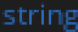

In [50]:
from torchvision.transforms import InterpolationMode
import cv2
import torchvision
import numpy as np
from PIL import Image, ImageColor, ImageDraw, ImageFilter, ImageFont
img_np = np.load(f'for_rec_data/image_test/example_image_{1}.npy','r')
print(f'{img_np.shape=}')


img1 = rec.image_resize(img_np, width = None, height = 32)

print(f'{img1.shape=}')

img2 = Image.fromarray(img1)

img_tensor,_=dataset.transforms(img2,None)

print(img_tensor.shape)
img_tensor = img_tensor.unsqueeze(0)
print(img_tensor.shape)

txt = rec.get_text_from_image(img_tensor)
print(f'{txt=}')
img2

In [ ]:
# распознование картинки из тренировочного набора
# не доведено до конца!!!!!!

from config_rec import all_alph,train_conf
import MyGenerator.ImageGenerator as im
import importlib
importlib.reload(im)
from MyGenerator.ImageGenerator import ImageGenerator
from MyRecognizer import Recognizer
import torchmetrics

#model_path = 'output/model_rec_text_best_scale/CRNN_LSTM_min_loss.pth'

#rec = Recognizer(model_path, all_alph)

train_conf = [{
    'fonts':['example/TextBPNPlusPlus/dataset/MyGenerator/font.ttf'],
    'is_crop':[True]
    , 'text_colors':['#2C6DBF']
    , 'background_colors':['#1E1E1E']
    , 'texts':
        
        # array[0:350]
        #list(map(str,np.random.random_integers(100,100000,100)))
        #['12345678901234567890123456789012345678901234567890'] #14 epoch
        #['deletedresponsiblepersonid'] #477 epoch
        [
            '0',
            '01',
            '012',
            '0123',
            '01234',
            '012345',
            '0123456',
            '01234567',
            '012345678',
            '0123456789',
            '01234567890',
            '012345678901',
            '0123456789012',
            '01234567890123',
            '012345678901234',
            '0123456789012345',
            '01234567890123456',
            '012345678901234567',
            '0123456789012345678',
            '01234567890123456789',
            '012345678901234567890'
         ] #407 epoch
    ,
    #'size_images':[((int(153/16)+1)*16 +2 ,18)] #for cnn_output_width = 19
    'size_images':[(160 ,32)] #cnn_output_width * 16 + 2
    , 'is_simple_text':[True]
    , 'font_sizes':[13]
    , 'is_scale':[True]
    , 'scale_size':[(None, 32)]
}]

im_gen = ImageGenerator(train_conf)

print(f'{im_gen.size=}')
print(f'{im_gen.size_word=}')

_,axs = plt.subplots(im_gen.size_word,figsize=(5*im_gen.size_word,10))


model_path = 'output/model_rec_text_best_scale_1/CRNN_LSTM_min_loss.pth'
rec = Recognizer(model_path, all_alph)

for i in range(im_gen.size_word):
    img,text = im_gen.get_by_word_index(i)
    img_tensor,t = transform(img,None)
    text_res = rec.get_text_from_image(img_tensor.unsqueeze(0))
    print(f'{text=} {text_res=}')
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].imshow(img)
plt.show()




# #cer = torchmetrics.CharErrorRate()
# #print(cer(text, 'abc56767') )


# plt.imshow(img)
# plt.show()



### Теперь проверка на реальной картинке

In [51]:
def image_resize(image:np.ndarray, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [52]:
import os

from torchvision.transforms import InterpolationMode
import cv2
import torchvision
import numpy as np
from PIL import Image, ImageColor, ImageDraw, ImageFilter, ImageFont

arr = os.listdir('for_rec_data/image_real')
for file in arr:
    img_np = np.load('for_rec_data/image_real/'+file,'r')
    #print(f'{img_np.shape=}')
    img1 = image_resize(img_np, width = None, height = 32)
    #print(f'{img1.shape=}')
    img2 = Image.fromarray(img1)
    img_tensor,_=dataset.transforms(img2,None)
    #print(img_tensor.shape)
    img_tensor = img_tensor.unsqueeze(0)
    #print(img_tensor.shape)
    txt = rec.get_text_from_image(img_tensor)
    print(f'{txt=}')
    #img2




#for file in arr:

txt='get'
txt='пchgnge>'
txt='chenges'
txt='{'
txt='stuing'
txt='lastuzl'
txt='шsещйг;'
txt='get'
txt='pzqtected'
txt=');'
txt='o'
txt='ueatedn;'
txt='='
txt='o'
txt='виндт'
txt='!'
txt='оctng='
txt='}'
txt='login;'
txt=':'
txt='оежсвдиоnв-'
txt='autuorgocenge'
txt='{'
txt='fnt'
txt='есырtртmы-'
txt='liferime;'
txt='login;'
txt='octng='
txt='ochanges'
txt='!'
txt='тve'
txt='{'
txt=')}'
txt='оеазрtрnы'
txt='}'
txt='{'
txt='stuing'
txt='session!nfo'
txt='cueatedn'
txt='тve'
txt='пвинд'
txt='ваseentity'
txt='puotected'
txt='sthing'
txt='--'
txt='}'
txt='qautuorx'
txt='sthing'
txt='wetun'
txt='!'
txt='oreerenaes'
txt='usедйр'
txt='set'
txt='{'
txt='paterime'
txt='togin'
txt='wetun'
txt='pzqtected'
txt='пchgnge>'
txt='public'
txt='public'
txt='last+ccessbate;'
txt='etng='
txt='qet'
txt='ore=et-'
txt='='
txt='set'
txt='login'
txt=']'
txt='pzotected'
txt='шsедйр'
txt='}'
txt='pzotected'
txt='sthing'
txt='!'
txt='set'
txt='public'
txt=']'
txt='ueated0n'
txt='vauue;'
txt='paterime'
txt='usezzp;